# Project <font color='red'> ::</font> Kickstarter    

-----------------------------------------------------------------------------------------------------------------------

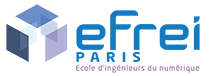

## Pyhton for Data Science
#### M1 -  Promo 2021
### Project by: 
- #### CHADID Dona
- #### TRULLIER Jérémy

----------------------------------------------------------------------------------------------------------------------

### Crowdfunding is the practice of funding a project or venture by raising small amounts of money from a large number of people, typically via the Internet. Crowdfunding is a form of crowdsourcing and alternative finance. In 2015, over 34 billion US Dollars was raised worldwide by crowdfunding. - Wikipedia


### Kickstarter is an American public-benefit corporation based in Brooklyn, New York, that maintains a global crowdfunding platform focused on creativity and merchandising. The company's stated mission is to "help bring creative projects to life". -Wikipedia

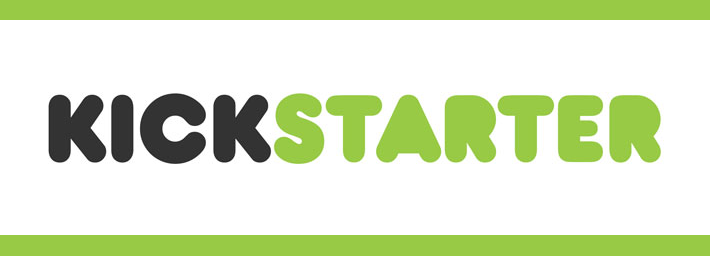

### With the data that is provided we are going to try to analyse the different projects to answer multiple questions.
### Some of these questions are:

- ### What makes a project successful?
- ### On which month of the year, I should post my project on Kickstarter?
- ### What is the ideal goal that I should define for the project?
- ### In which category, projects are most successful?

## <font color='green'> Our Hypothesis</font> :

### The analysis that we are going to perform on the Data set depends on many factors. So we are going to presuppose (hypothesize) the variables that would be very important to foretell the success of a project on Kickstarter:

- ### The Goal i.e. the total amount to be raised --> The smaller the amount the more likely that the project will be successful, so the goal should be reasonable.
- ### The duration of the project --> It's possible that if the duration too short or too long the project will fail.
- ### The topic of the project --> The more the poject is desirable the more it's likely to succeed.
- ### The category of the project.
- ### The launch date of the project --> maybe launching a project during the first half of the year, renders it more successful.
- ### The success of a project depend on the country of the launch.

### This is an incomplete list of factors. So in this project we are going to do analysis and machine learning to try to understand which features are important but also what are the values which these features can take to make our model optimal.

## <font color='red'> Step 1</font>: Exploration and data analysis

- ###   Loading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import seaborn as sns

sns.set()

In [2]:
data = pd.read_csv('ks-projects-201801.csv')
data.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

In [3]:
data.shape

(378661, 15)

So we have 378661 project and 15 feature.

- ### Data preprocessing (Cleaning) 


###### In this section we are going to:
- ###### Handle missing data
- ###### Feature Engineering
- ###### Encode the categorical features
- ###### Remove unwanted columns or variables

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


###### We choose to drop backers, ID, currency, pledged, usd pledged and goal because :

- ###### we want to predict some variables before the project is launched
- ###### the ID is not a relevant column
- ###### pledged and usd_pledged are removed to keep usd_pledged_real
- ###### goal is removed and we keep usd_goal_real
- ###### as we removed a lot of variables linked to currency and most of the data is in dollars, we removed currency and took all the data as if it was dollars

In [5]:
data = data.drop(["backers", "ID", "currency", "pledged", "usd pledged", "goal"], axis =1)

In [6]:
data.isnull().sum()

name                4
category            0
main_category       0
deadline            0
launched            0
state               0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

###### We change the type of launched and deadline from string to datetime

In [7]:
from datetime import datetime
data['launched'] = pd.to_datetime(data['launched'])
data["deadline"] = pd.to_datetime(data['deadline'])

- ### Visualization of the different data

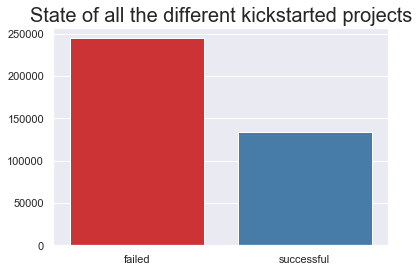

In [8]:
data["state"] = data["state"].apply(lambda x: 1 if x=="successful" else 0)
state = data['state'].map({
        0 : 'failed',
        1 : 'successful' })
state_count = state.value_counts()
sns.barplot(x=state_count.index, y=state_count.values, palette = sns.color_palette("Set1"))
plt.title("State of all the different kickstarted projects", fontsize = 20)
plt.show()

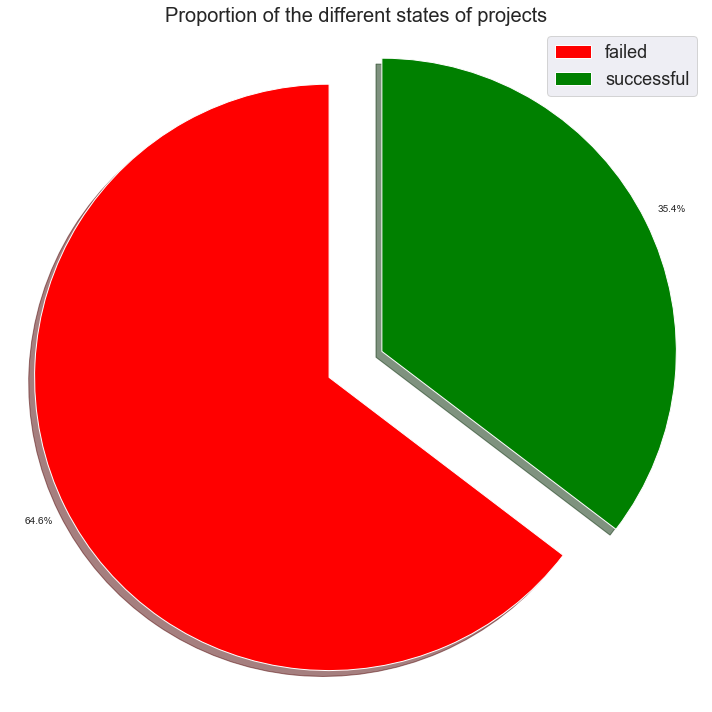

In [9]:
from collections import Counter

count = Counter(state)

labels = count.keys()
amount = count.values()

explode = (0.1, 0.1)

plt.figure(figsize=(10,10))
plt.pie(amount, autopct='%1.1f%%', pctdistance=1.1, startangle=90, explode=explode, shadow=True, 
        colors=('red', 'green'))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Proportion of the different states of projects", fontsize=20)
plt.tight_layout()
plt.legend(labels,loc=1, fontsize=18)
plt.show()

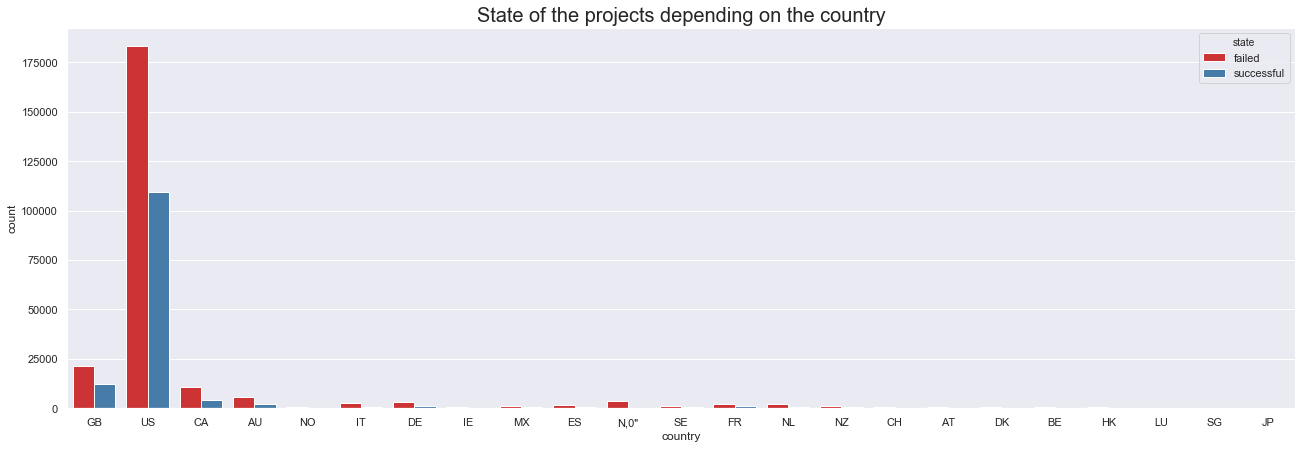

In [10]:
plt.figure(figsize=(22,7))
countries = data["country"].value_counts().iloc[0:10]
sns.countplot(x=data['country'], hue=state, data=data, palette = sns.color_palette("Set1"));
plt.title("State of the projects depending on the country", fontsize=20)
plt.show()

###### On this dataset the majority of the kickstarter projects are from US and GB, so country is not a relevant feature here, but it may be if we had more data for projects from other countries.

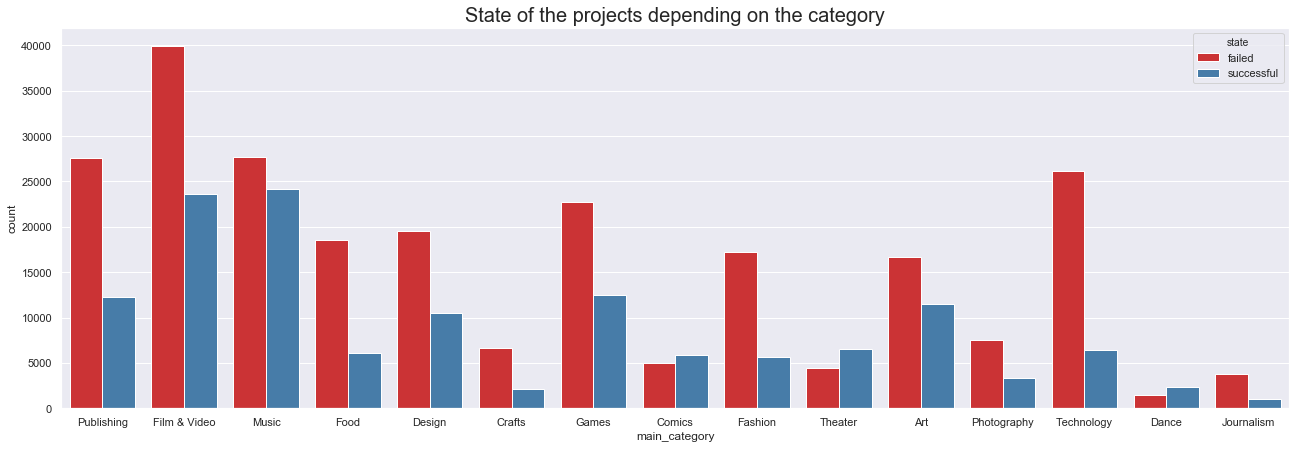

In [11]:
plt.figure(figsize=(22,7))
plt.title("State of the projects depending on the category", fontsize=20)
sns.countplot(x=data['main_category'], hue=state, data=data, palette = sns.color_palette("Set1"));

###### As there is a lot of different categories, we only focus on the main_category feature

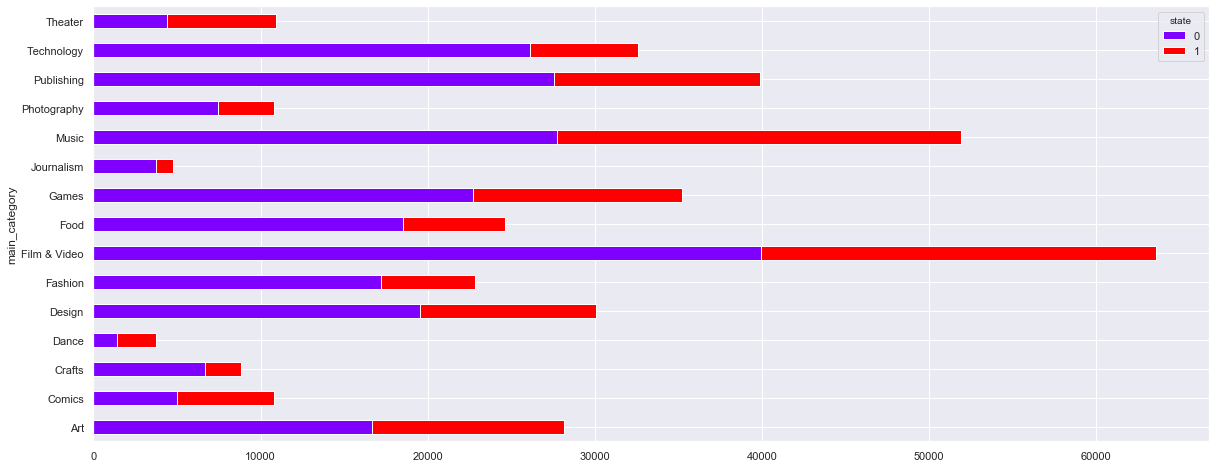

In [12]:
category_state = data.groupby(['main_category', 'state'])
count_category_state = category_state.size().unstack()
count_category_state.plot(kind='barh', figsize=[20,8], colormap='rainbow', stacked = True)
plt.show()

###### We can see that Comics, Dance and Theater projects have more successful projects, but also less projects in these category have been launched

###### To ease the analysis of the data we can divide the launch date into year, month and day

In [13]:
# Feature Engineering
data["launched_month"] = data["launched"].dt.month
data["launched_week"] = data["launched"].dt.week
data["launched_day"] = data["launched"].dt.weekday
data["is_weekend"] = data["launched_day"].apply(lambda x: 1 if x > 4 else 0)
data["duration"] = data["deadline"] - data["launched"]
data["duration"] = data["duration"].apply(lambda x: int(str(x).split()[0]))

## label encoding the categorical features
data = pd.concat([data, pd.get_dummies(data["main_category"])], axis = 1)
le = LabelEncoder()
for c in ["category", "main_category"]:
    data[c] = le.fit_transform(data[c])

###### As we created the column duration, we can drop launched and deadline
###### we can drop country because it is not relevant here as we lack data from countries other than US and GB

In [14]:
data = data.rename(columns={"usd_pledged_real": "pledged", "usd_goal_real": "goal"})
data = data.drop(["launched", "deadline", "country"], axis = 1)

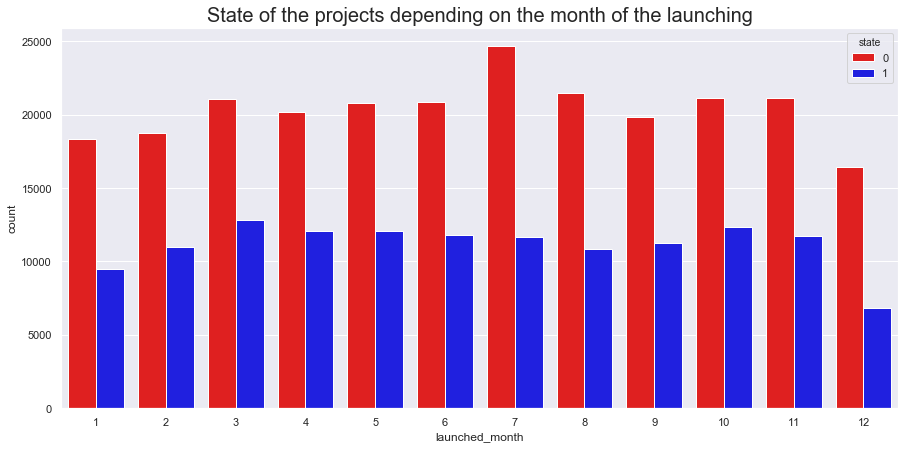

In [15]:
plt.figure(figsize=(15,7))
plt.title("State of the projects depending on the month of the launching", fontsize=20)
sns.countplot(x=data['launched_month'], hue=data["state"], data=data, palette = ('red', 'blue'));

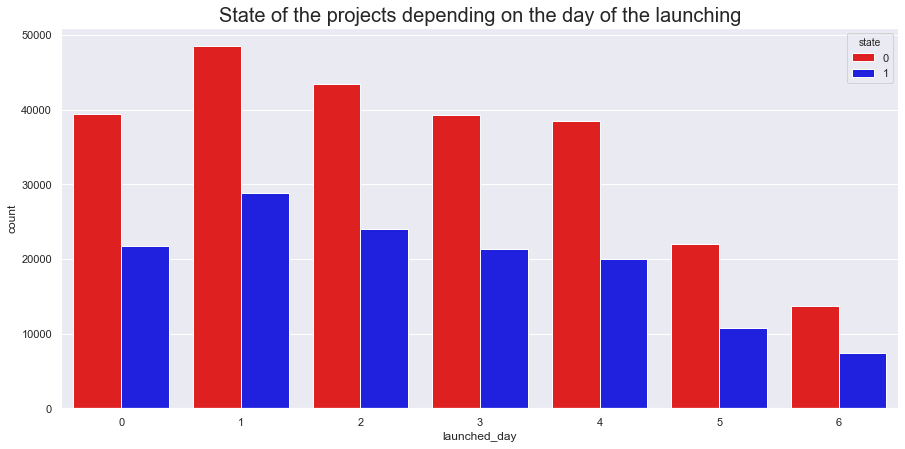

In [16]:
plt.figure(figsize=(15,7))
plt.title("State of the projects depending on the day of the launching", fontsize=20)
sns.countplot(x=data['launched_day'], hue=data["state"], data=data, palette = ('red', 'blue'));

###### We can see that a project launched over the weekend has less successful projects than one launched on Tuesday

C:\Users\Donac\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


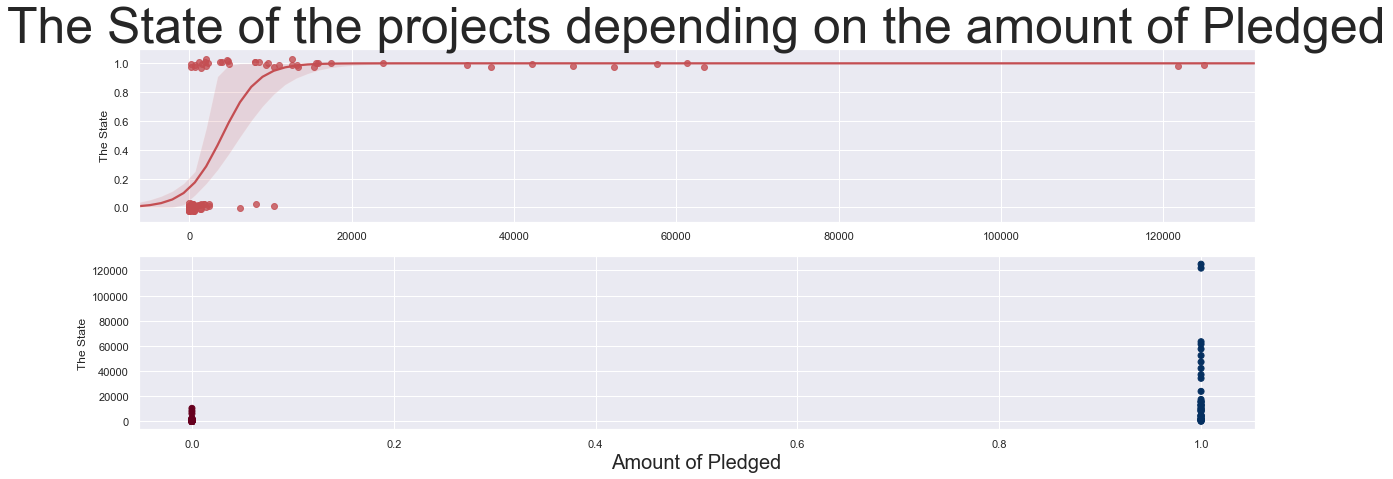

In [17]:
plt.figure(figsize=(20,7))

plt.subplot(2, 1, 1)

sns.regplot(x=data[['pledged']][:100], y=data['state'][:100], 
            data=data, logistic=True, n_boot=500, y_jitter=.03, color='r')
plt.title("The State of the projects depending on the amount of Pledged",fontsize=50)
plt.ylabel("The State")

plt.subplot(2, 1, 2)
plt.scatter( data['state'][:100],data[['pledged']][:100], c=data['state'][:100], cmap="RdBu")
plt.xlabel("Amount of Pledged",fontsize=20)
plt.ylabel("The State")
plt.show()

###### The figure shows that if the amount of Pledged increases the state is shifted to successful. Since we can't actually know the pledged amount before hand we cant integrate it in our model.


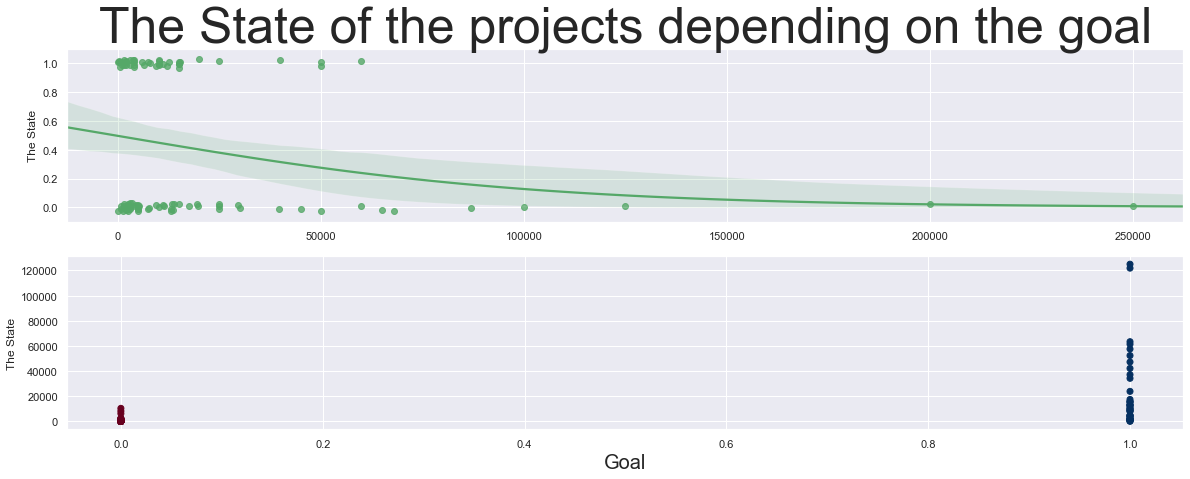

In [18]:
plt.figure(figsize=(20,7))

plt.subplot(2, 1, 1)

sns.regplot(x=data[['goal']][:100], y=data['state'][:100], 
            data=data, logistic=True, n_boot=500, y_jitter=.03, color='g')
plt.title("The State of the projects depending on the goal",fontsize=50)
plt.ylabel("The State")

plt.subplot(2, 1, 2)
plt.scatter( data['state'][:100],data[['pledged']][:100], c=data['state'][:100], cmap="RdBu")
plt.xlabel("Goal",fontsize=20)
plt.ylabel("The State")
plt.show()

###### The figure shows that if the Goal in USD increases the state is shifted to Failed.

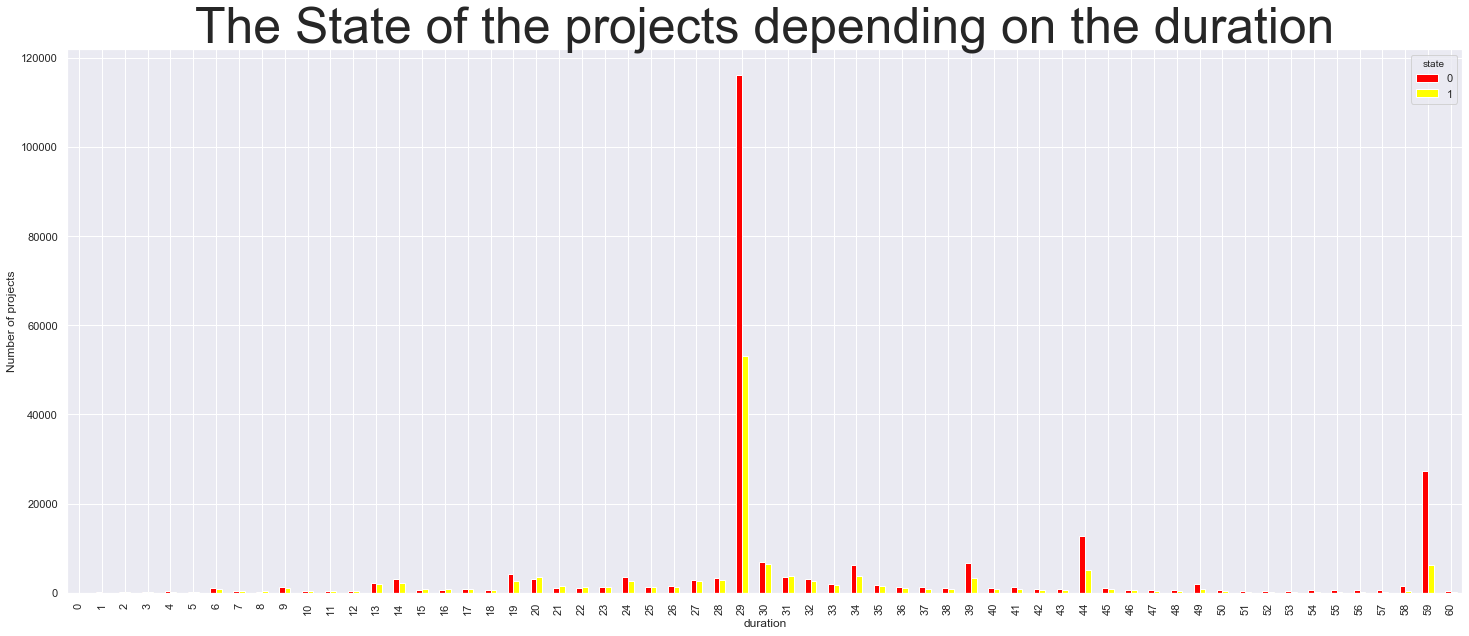

In [19]:
duration_state = data.groupby(['duration', 'state'])
count_duration_state = duration_state.size().unstack()
count_duration_state =count_duration_state.dropna()
count_duration_state = count_duration_state[:61]
count_duration_state.plot(kind='bar', figsize=[25,10], colormap='autumn', stacked = False)
plt.title("The State of the projects depending on the duration",fontsize=50)
plt.ylabel("Number of projects")
plt.show()

###### This plot shows that a dependency exist between the state and the duration.

###### Now we can start to group Categry and main_category and do some aggregation on them, to representing them by popularity (For  example: How many projects are in which category.

In [45]:
group_main_cat = data.groupby("main_category").agg({"goal" : "mean", "category" : "sum"})
group_cat = data.groupby("category").agg({"goal" : "mean", "main_category" : "sum"})
group_main_cat = group_main_cat.reset_index().rename(columns={"goal" : "mean_main_category_goal", "category" : "main_category_count"})
group_cat = group_cat.reset_index().rename(columns={"goal" : "mean_category_goal", "main_category" : "category_count"})
data = data.merge(group_cat, on = "category")
data = data.merge(group_main_cat, on = "main_category")

In [21]:
data['is_weekend'] = data.is_weekend.astype(bool)
d = data.iloc[:, 10:25] 

for column in d:
   data[column] =  data[column].astype(bool)

## <font color='red'> Step 2</font>: Machine Learning

- ### Modelling

###### After the cleaning and exploration of data we are going to try to predict if a project is successful from our chosen features.
###### For that we are going to use Random forest because it will be suited for our need of classification.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
# Defining independent and independent variables 
y = data.state
X = [c for c in data.columns if c not in ["state", "name"]]

In [23]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[X],y,test_size=0.30, shuffle=True, random_state = 2) #70% training and 30% testing

In [24]:
## train our model 
model = RandomForestClassifier(n_estimators=100, min_samples_leaf = 5).fit(X_train, y_train)
y_pred = model.predict(X_test)

In [44]:
## classification report
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

              precision    recall  f1-score   support

           0       0.73      0.86      0.79     73515
           1       0.61      0.41      0.49     40084

    accuracy                           0.70    113599
   macro avg       0.67      0.63      0.64    113599
weighted avg       0.68      0.70      0.68    113599

Confusion Matrix:
[[62927 10588]
 [23848 16236]]


###### We used Random Forest model because it had the best accuracy 70% (after testing multiple classification models). The model predicts the failed state with approximately 80% accuracy and a recall of 83%, the success state with approximately 50% accuracy. 

- ### Interpreting our model

 ###### - Relative Feature Importance : Which are the most important features of a project?

In [27]:
#coef = model.coef_.reshape(-1,1) #model.feature_importances_
feature_importances = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=False)

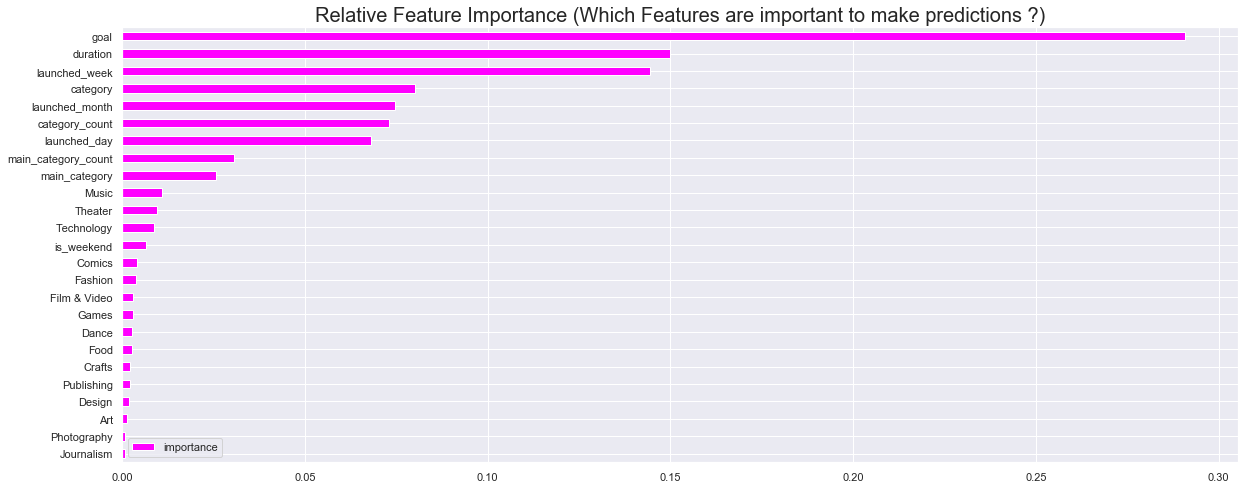

In [28]:
feature_importances.plot(kind='barh', figsize=[20,8], colormap='spring', stacked = True)
plt.title('Relative Feature Importance (Which Features are important to make predictions ?)', fontsize=20)
plt.gca().invert_yaxis()
plt.show()

In [29]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go

colors = ["grey"] * 9 + ["blue"]*6
trace1 = go.Bar(y = [x.title()+"  " for x in feature_importances.index[:15][::-1]], 
                x = feature_importances.importance[:15][::-1], 
                name="feature importance (relative)",
                marker=dict(color=colors, opacity=0.4), orientation = "h")

data_ = [trace1]

layout = go.Layout(
    margin=dict(l=400), width = 1000,
    xaxis=dict(range=(0.0,0.15)),
    title='Relative Feature Importance (Which Features are important to make predictions ?)',
    barmode='group',
    bargap=0.25
)

fig = go.Figure(data=data_, layout=layout)
iplot(fig)

from IPython.display import display
from IPython.core.display import HTML

tag = "<div> Most Important (Relative) : "
for feat in feature_importances.index[:10]:
    tag += "<span><font color='green'>" +feat.title().replace("_","")+ "</font> &nbsp;|&nbsp; </span>" 
tag += "<br>Least Important (Relative) : "
for feat in feature_importances.index[-15:]:
    tag += "<span><font color='red'>" +feat.title().replace("_","")+ "</font> &nbsp;|&nbsp; </span>" 
tag += "</div>"
display(HTML(tag))

- ###### From the graph, it is clear that the features which are important to predict the project success are: project pledged, goal, length of the project name, launched week, duration.
- ###### While the least important features are are mostly related to the project categories

###### What does this mean? For someone who is going to publish their project on Kickstarter, they should definitly consider the number of pledged needed to make their project successful, the goal should be set to the requirement amount for the project because if the goal is higher or smaller than the amount that is needed the project would most likely fail. And the project should be published in the most desirable time and it should last for a good duration.

###### - Permutation Importance : Which features have the biggest impact on the project success?

In [38]:
from eli5.sklearn import PermutationImportance
import eli5
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
pi_df = eli5.explain_weights_df(perm, feature_names = X_test.columns.tolist())
pi_df["color"] = pi_df["weight"].apply(lambda x : "green" if x > 0 else "red")

data_ = [
    go.Bar(
        orientation = "h",
        y = pi_df.feature[::-1],
        x = pi_df.weight[::-1],
        marker = dict(
            opacity = 0.5,
            color = pi_df.color[::-1]        ),
        error_x = dict( type='data', color="#9fa3a3",
            array=list(pi_df["std"][::-1]),
            visible=True),
        name = 'expenses'
    )
]


layout = go.Layout(title="Permutation Importance", height = 800, margin=dict(l=300))

annotations = []
for i, row in pi_df.iterrows():
    dict(y=row.feature, x=row.weight, text="d",
                                  font=dict(family='Arial', size=14,
                                  color='rgba(245, 246, 249, 1)'),
                                  showarrow=False,)
layout['annotations'] = annotations
fig = go.Figure(data=data_, layout = layout)
iplot(fig, filename='base-bar')

###### Here we can observe that the features shown in top and in green are the most important as if their values are randomized then the outcome performance suffers.
###### We can observe that the top features are the features which we mostly saw in the relative importance section, but using this graph we can quantify the amount of importance associated with them. And also obtain the ones which are least important, for example - launched week, if it was weekend or not etc.

####  - Partial Dependencies : How does changes in those features affect the project success? 

###### After knowing the relative importance and the permutation importance, we are going to explore the details of these features which will give us insights to which values of our features contribute to our model. For example in which category we are going to find the most successful projects depending on the popularity of the category.


In [31]:
from pdpbox import pdp, get_dataset, info_plots

def plot_my_plot(feature, line_color, fill_color):
    plot_params = {
        'title': feature.title() + ' - Partial Dependency Plot',
        'title_fontsize': 20,
        'subtitle': 'How changes in "%s" affects the model predictions' % feature.title(),
        'subtitle_fontsize': 15,
        'font_family': 'Calibri',
        'xticks_rotation': 0,
        'line_cmap': 'cool',
        'zero_color': '#a2a5a0',
        'zero_linewidth': 1.0,
        'pdp_linewidth': 2.0,
        'fill_alpha': 0.25,
        'markersize': 5.5,
        'pdp_hl_color': 'green',
        'pdp_color': line_color,
        'fill_color': fill_color,

    }
    pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=X_test.columns, feature=feature)
    pdp.pdp_plot(pdp_goals, feature, plot_params = plot_params, center=True, plot_lines=False, frac_to_plot=100, plot_pts_dist=False)
    plt.ylabel("Change in Model Predictions");
    plt.show();

interesting_features = ['goal', 'duration', 'launched_month', 'launched_day', 
                       'launched_week', 'category_count']

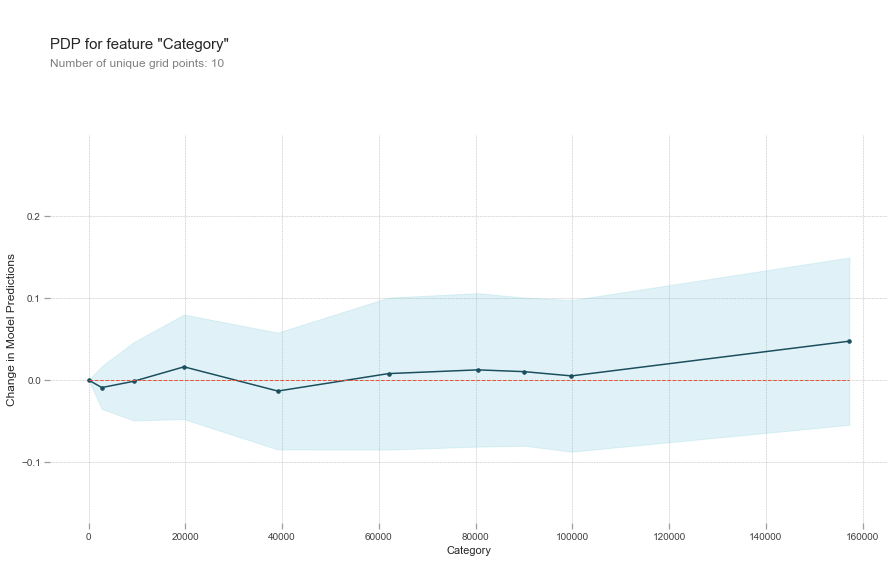

In [32]:
pdp_category = pdp.pdp_isolate(model=model, dataset=X_test, model_features=X_test.columns, feature='category_count')

fig, axes = pdp.pdp_plot(pdp_isolate_out = pdp_category, feature_name='Category', 
                         center=True, plot_lines=False, frac_to_plot=100, plot_pts_dist=False)

plt.ylabel("Change in Model Predictions")
plt.show()

###### We can see here that more a category is popular, in general, the more likely a project will succeed. 

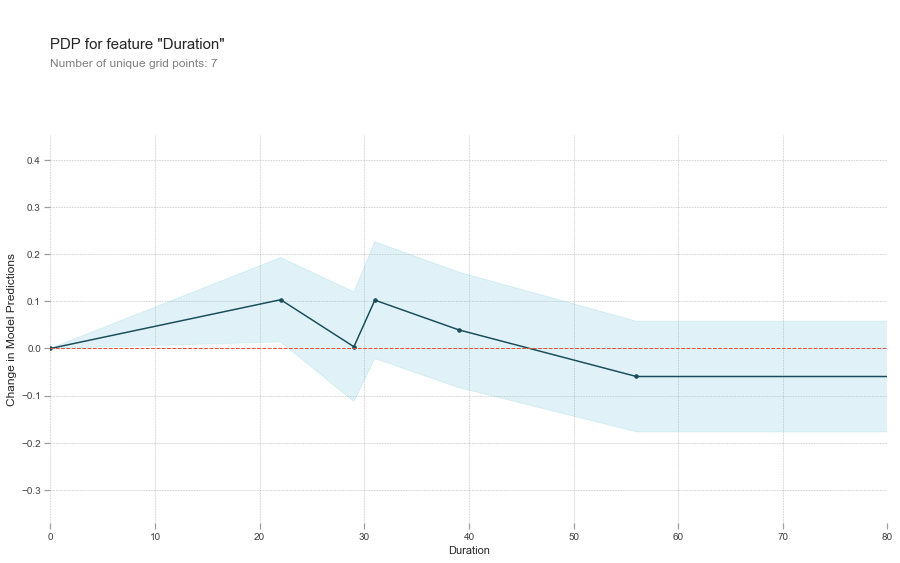

In [33]:
pdp_category = pdp.pdp_isolate(model=model, dataset=X_test, model_features=X_test.columns, feature='duration')

fig, axes = pdp.pdp_plot(pdp_isolate_out = pdp_category, feature_name='Duration', 
                         center=True, plot_lines=False, frac_to_plot=100, plot_pts_dist=False)
plt.xlim(0, 80)
plt.ylabel("Change in Model Predictions")
plt.show()

###### This graph shows that the best duration a project should last for maximum 45 weeks. 

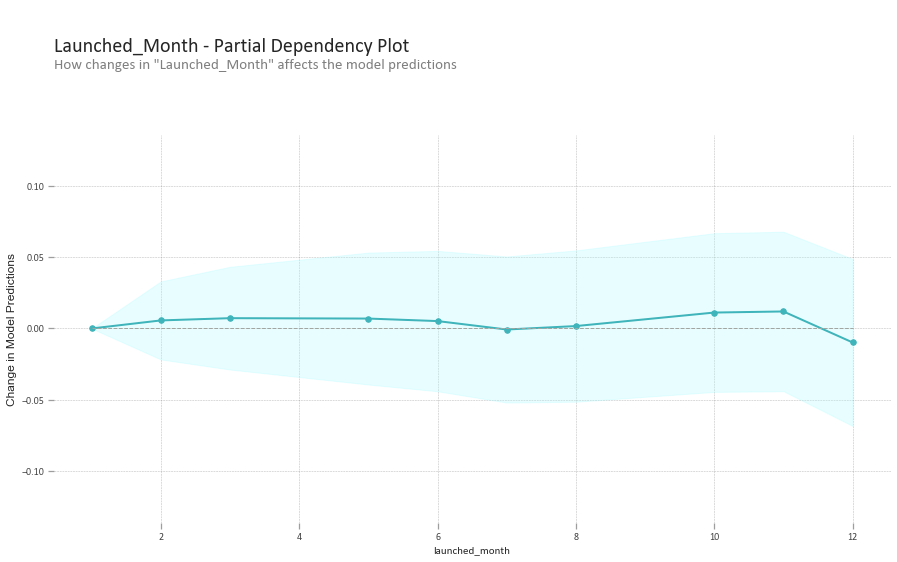

In [34]:
plot_my_plot(interesting_features[2], "#3fb4ba", "#a3faff")

###### This graph shows that publishing the project in the mid of the year is the best way to optimize the success of the project. And it wouldn't be the best choice to publish the project at the end of the year.

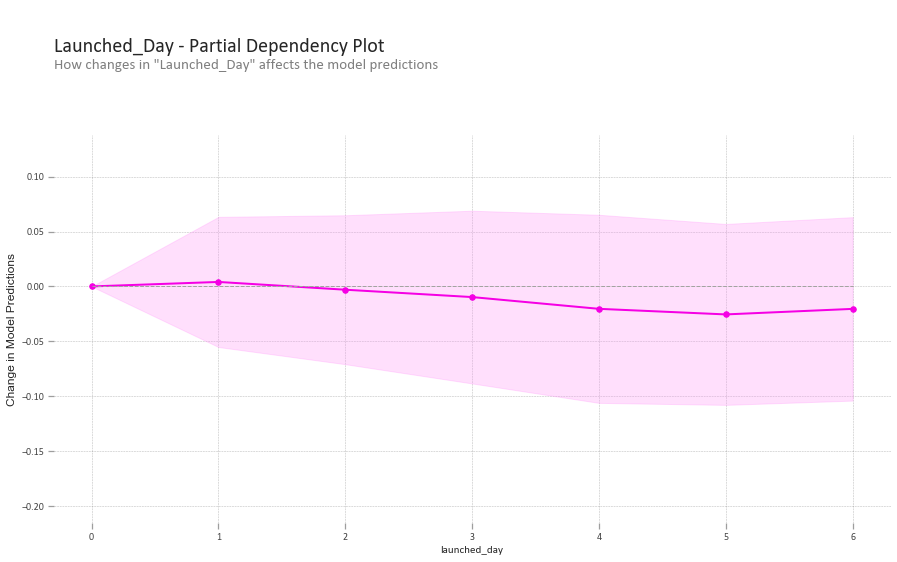

In [35]:
plot_my_plot(interesting_features[3], "#f500e4", "#ff82f7")

###### Here we can see that publishing a project during the week-end minimize the chance of a success, and maximize it between Monday and Wednesday.

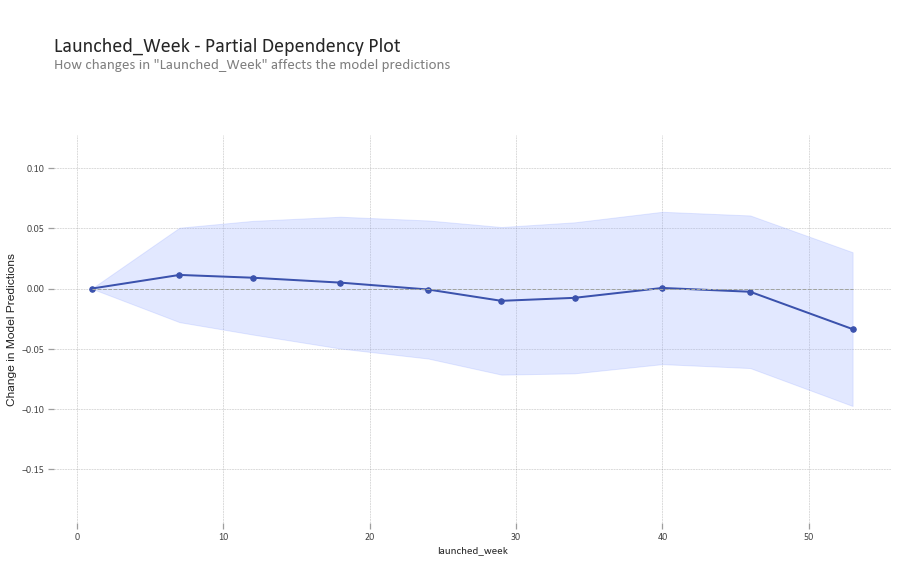

In [36]:
plot_my_plot(interesting_features[4], "#3b52ad", "#8fa5ff")

###### This graph confirms the graph of lauched_month.

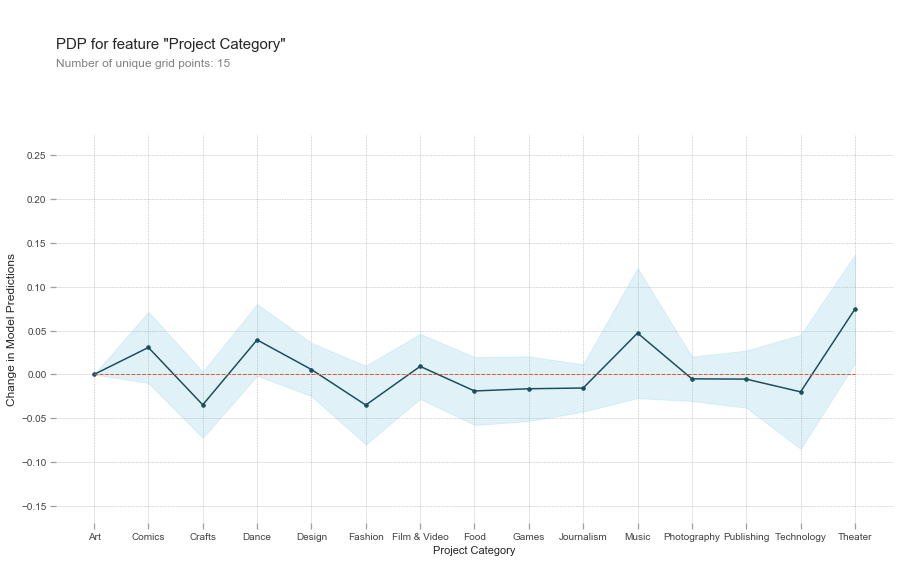

In [37]:
pdp_category = pdp.pdp_isolate(model=model, dataset=X_test, model_features=X_test.columns,
                             feature=['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video', 
                                      'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing', 'Technology', 'Theater'])
fig, axes = pdp.pdp_plot(pdp_isolate_out = pdp_category, feature_name='Project Category', 
                         center=True, plot_lines=False, frac_to_plot=100, plot_pts_dist=False)
plt.ylabel("Change in Model Predictions")
plt.show()

###### This graph shows that success is highly correlated with the category (precisely the popularity of this category). For example, if the project is in the music category, it would have a high chance of success. 

## <font color='red'> Step 3</font>: Conclusion

### The goal of the analysis of this dataset about Kickstarter projects was to determine what makes a project successful and how to launch the project (goal, launch date) to make it successful, and which categories are the most popular.

### We started by cleaning the data and exploring it to see which features were relevant.

#### We compared the relevant features to the state of the project to see which ones had a significant impact on the state :
- ###### the goal.
- ###### the category of the project.
- ###### the duration.
- ###### the moment the project was launched.

#### Then we built a predictive model to predict the state of a project according to its relevant features. We used the Random Forest model because it had the best accuracy of 70% (after testing multiple classification models). The model predicts the failed state with approximately 80% accuracy and a recall of 83%, the success state with approximately 50% accuracy, which is what we want because we would rather predict a fail when it's really a success than vice versa.
#### Following this model we are able to advise someone who wishes to launch a project, by recommending them to fix its goal to a certain amount and the duration to a certain time.

#### If someone wants to start a project on this platform, they should wisely choose the project category first, and after that adapt the goal, the duration, and the launch date.

###### <font color='red'> PS</font>: It would be interesting fo the future to do an analysis of the names of the projects, which would determine, for example, the category of words that are more desirable by backers. 